## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import statsModel
import scrapbook as sb 
import torch 
import statsModel
import baselineModels
import energyefficiencyDataset
import dataset 
from torch.utils.data import random_split 
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error,mean_absolute_error 

## Import Dataset 


In [3]:
n_features = 13
n_samples= 506
n_target = 1 
X,Y = energyefficiencyDataset.energy_data()

     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28


In [4]:
# Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

## Stats Model 



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.918
Model:                            OLS   Adj. R-squared (uncentered):              0.917
Method:                 Least Squares   F-statistic:                              972.8
Date:                Sun, 24 Jul 2022   Prob (F-statistic):                        0.00
Time:                        16:11:08   Log-Likelihood:                         -98.145
No. Observations:                 614   AIC:                                      210.3
Df Residuals:                     607   BIC:                                      241.2
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

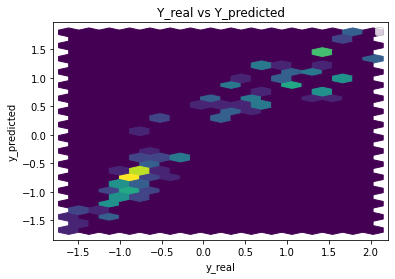

Performance Metrics
Mean Squared Error: 0.09728248075140021
Mean Absolute Error: 0.22154069987020503
Manhattan distance: 34.117267780011574
Euclidean distance: 3.870594532590004


Stats Model MAE 0.22154069987020503


In [5]:
coefficients , y_pred =statsModel.statsModel(X_train,y_train,X_test,y_test)
#Store MSE Value 
sb.glue("Coefficients",coefficients)
mae = mean_absolute_error(y_pred, y_test)
print("Stats Model MAE", mae)

# Catboost Model 

In [6]:
mae_cb = baselineModels.catboost(X_train,y_train,X_test,y_test)
#Store MSE Value
sb.glue("Catboost MAE",mae_cb)
print("Catboost MAE",mae_cb)

Learning rate set to 0.037906
0:	learn: 0.9629179	total: 53.5ms	remaining: 53.4s
1:	learn: 0.9308791	total: 53.9ms	remaining: 26.9s
2:	learn: 0.9036698	total: 56.8ms	remaining: 18.9s
3:	learn: 0.8731379	total: 57.1ms	remaining: 14.2s
4:	learn: 0.8483964	total: 57.3ms	remaining: 11.4s
5:	learn: 0.8206899	total: 57.5ms	remaining: 9.53s
6:	learn: 0.7982515	total: 67.7ms	remaining: 9.6s
7:	learn: 0.7753420	total: 68.3ms	remaining: 8.46s
8:	learn: 0.7494825	total: 69.2ms	remaining: 7.62s
9:	learn: 0.7263010	total: 71.6ms	remaining: 7.09s
10:	learn: 0.7035836	total: 72.1ms	remaining: 6.48s
11:	learn: 0.6807286	total: 72.4ms	remaining: 5.96s
12:	learn: 0.6612224	total: 72.8ms	remaining: 5.52s
13:	learn: 0.6425774	total: 73.9ms	remaining: 5.2s
14:	learn: 0.6224145	total: 74.2ms	remaining: 4.87s
15:	learn: 0.6041819	total: 74.7ms	remaining: 4.59s
16:	learn: 0.5851680	total: 75ms	remaining: 4.34s
17:	learn: 0.5682604	total: 75.9ms	remaining: 4.14s
18:	learn: 0.5517324	total: 76.3ms	remaining: 3.

40:	learn: 0.2898727	total: 90.7ms	remaining: 2.12s
41:	learn: 0.2824613	total: 93ms	remaining: 2.12s
42:	learn: 0.2755475	total: 94.6ms	remaining: 2.1s
43:	learn: 0.2682664	total: 95.6ms	remaining: 2.08s
44:	learn: 0.2610247	total: 96.4ms	remaining: 2.04s
45:	learn: 0.2550679	total: 96.9ms	remaining: 2.01s
46:	learn: 0.2492935	total: 97.5ms	remaining: 1.98s
47:	learn: 0.2436977	total: 98ms	remaining: 1.94s
48:	learn: 0.2374259	total: 98.7ms	remaining: 1.92s
49:	learn: 0.2316245	total: 99.3ms	remaining: 1.89s
50:	learn: 0.2252811	total: 100ms	remaining: 1.86s
51:	learn: 0.2199130	total: 101ms	remaining: 1.84s
52:	learn: 0.2142302	total: 101ms	remaining: 1.81s
53:	learn: 0.2088211	total: 102ms	remaining: 1.79s
54:	learn: 0.2030120	total: 103ms	remaining: 1.76s
55:	learn: 0.1974377	total: 103ms	remaining: 1.74s
56:	learn: 0.1919382	total: 104ms	remaining: 1.71s
57:	learn: 0.1871482	total: 104ms	remaining: 1.69s
58:	learn: 0.1835608	total: 105ms	remaining: 1.67s
59:	learn: 0.1790452	total

70:	learn: 0.1380457	total: 110ms	remaining: 1.44s
71:	learn: 0.1354580	total: 111ms	remaining: 1.43s
72:	learn: 0.1326705	total: 111ms	remaining: 1.42s
73:	learn: 0.1294187	total: 112ms	remaining: 1.4s
74:	learn: 0.1268866	total: 113ms	remaining: 1.39s
75:	learn: 0.1247573	total: 113ms	remaining: 1.38s
76:	learn: 0.1225919	total: 114ms	remaining: 1.36s
77:	learn: 0.1195410	total: 114ms	remaining: 1.35s
78:	learn: 0.1175124	total: 115ms	remaining: 1.33s
79:	learn: 0.1160033	total: 115ms	remaining: 1.32s
80:	learn: 0.1133809	total: 115ms	remaining: 1.31s
81:	learn: 0.1117602	total: 116ms	remaining: 1.3s
82:	learn: 0.1100899	total: 116ms	remaining: 1.28s
83:	learn: 0.1077011	total: 117ms	remaining: 1.27s
84:	learn: 0.1061679	total: 117ms	remaining: 1.26s
85:	learn: 0.1040661	total: 118ms	remaining: 1.25s
86:	learn: 0.1020910	total: 119ms	remaining: 1.25s
87:	learn: 0.0999066	total: 119ms	remaining: 1.24s
88:	learn: 0.0981824	total: 120ms	remaining: 1.23s
89:	learn: 0.0963340	total: 121ms

130:	learn: 0.0585629	total: 143ms	remaining: 950ms
131:	learn: 0.0580836	total: 144ms	remaining: 947ms
132:	learn: 0.0576832	total: 145ms	remaining: 945ms
133:	learn: 0.0572374	total: 145ms	remaining: 939ms
134:	learn: 0.0567052	total: 146ms	remaining: 935ms
135:	learn: 0.0562017	total: 146ms	remaining: 930ms
136:	learn: 0.0557943	total: 147ms	remaining: 927ms
137:	learn: 0.0552950	total: 148ms	remaining: 923ms
138:	learn: 0.0549421	total: 148ms	remaining: 919ms
139:	learn: 0.0545067	total: 149ms	remaining: 916ms
140:	learn: 0.0540825	total: 150ms	remaining: 911ms
141:	learn: 0.0537313	total: 150ms	remaining: 907ms
142:	learn: 0.0533725	total: 151ms	remaining: 903ms
143:	learn: 0.0531339	total: 151ms	remaining: 899ms
144:	learn: 0.0528132	total: 152ms	remaining: 894ms
145:	learn: 0.0525852	total: 152ms	remaining: 890ms
146:	learn: 0.0523185	total: 152ms	remaining: 884ms
147:	learn: 0.0519613	total: 153ms	remaining: 879ms
148:	learn: 0.0516307	total: 153ms	remaining: 874ms
149:	learn: 

276:	learn: 0.0335646	total: 221ms	remaining: 577ms
277:	learn: 0.0335054	total: 222ms	remaining: 578ms
278:	learn: 0.0334462	total: 225ms	remaining: 581ms
279:	learn: 0.0333644	total: 226ms	remaining: 580ms
280:	learn: 0.0332806	total: 227ms	remaining: 580ms
281:	learn: 0.0332425	total: 227ms	remaining: 579ms
282:	learn: 0.0330822	total: 228ms	remaining: 577ms
283:	learn: 0.0329211	total: 228ms	remaining: 575ms
284:	learn: 0.0328528	total: 228ms	remaining: 573ms
285:	learn: 0.0327758	total: 229ms	remaining: 571ms
286:	learn: 0.0327223	total: 229ms	remaining: 569ms
287:	learn: 0.0325710	total: 229ms	remaining: 567ms
288:	learn: 0.0324670	total: 230ms	remaining: 566ms
289:	learn: 0.0323923	total: 231ms	remaining: 564ms
290:	learn: 0.0323382	total: 231ms	remaining: 563ms


291:	learn: 0.0322886	total: 247ms	remaining: 599ms
292:	learn: 0.0322081	total: 248ms	remaining: 599ms
293:	learn: 0.0321560	total: 249ms	remaining: 597ms
294:	learn: 0.0320861	total: 250ms	remaining: 597ms
295:	learn: 0.0320536	total: 250ms	remaining: 594ms
296:	learn: 0.0320038	total: 250ms	remaining: 592ms
297:	learn: 0.0318956	total: 251ms	remaining: 591ms
298:	learn: 0.0318418	total: 251ms	remaining: 589ms
299:	learn: 0.0318113	total: 251ms	remaining: 587ms
300:	learn: 0.0317164	total: 252ms	remaining: 585ms
301:	learn: 0.0316637	total: 252ms	remaining: 583ms
302:	learn: 0.0316029	total: 252ms	remaining: 580ms
303:	learn: 0.0314616	total: 253ms	remaining: 578ms
304:	learn: 0.0314092	total: 253ms	remaining: 577ms
305:	learn: 0.0313585	total: 253ms	remaining: 574ms
306:	learn: 0.0312490	total: 254ms	remaining: 572ms
307:	learn: 0.0311512	total: 254ms	remaining: 571ms
308:	learn: 0.0311175	total: 255ms	remaining: 570ms
309:	learn: 0.0310603	total: 255ms	remaining: 568ms
310:	learn: 

359:	learn: 0.0276179	total: 277ms	remaining: 492ms
360:	learn: 0.0275784	total: 277ms	remaining: 491ms
361:	learn: 0.0275402	total: 278ms	remaining: 490ms
362:	learn: 0.0274913	total: 278ms	remaining: 489ms
363:	learn: 0.0274441	total: 279ms	remaining: 487ms
364:	learn: 0.0273420	total: 279ms	remaining: 485ms
365:	learn: 0.0272755	total: 279ms	remaining: 484ms
366:	learn: 0.0272258	total: 280ms	remaining: 483ms
367:	learn: 0.0271668	total: 281ms	remaining: 482ms
368:	learn: 0.0271159	total: 281ms	remaining: 481ms
369:	learn: 0.0270568	total: 281ms	remaining: 479ms
370:	learn: 0.0270126	total: 282ms	remaining: 477ms
371:	learn: 0.0269483	total: 282ms	remaining: 476ms
372:	learn: 0.0268925	total: 282ms	remaining: 474ms
373:	learn: 0.0268457	total: 282ms	remaining: 473ms
374:	learn: 0.0268002	total: 283ms	remaining: 471ms
375:	learn: 0.0267446	total: 283ms	remaining: 470ms
376:	learn: 0.0266873	total: 284ms	remaining: 469ms
377:	learn: 0.0266561	total: 284ms	remaining: 467ms
378:	learn: 

544:	learn: 0.0209665	total: 357ms	remaining: 298ms
545:	learn: 0.0209397	total: 358ms	remaining: 298ms
546:	learn: 0.0209263	total: 359ms	remaining: 297ms
547:	learn: 0.0208955	total: 359ms	remaining: 296ms
548:	learn: 0.0208730	total: 360ms	remaining: 295ms
549:	learn: 0.0208602	total: 367ms	remaining: 300ms
550:	learn: 0.0208330	total: 369ms	remaining: 300ms
551:	learn: 0.0208184	total: 370ms	remaining: 300ms
552:	learn: 0.0207924	total: 370ms	remaining: 299ms
553:	learn: 0.0207564	total: 370ms	remaining: 298ms
554:	learn: 0.0207369	total: 371ms	remaining: 297ms
555:	learn: 0.0206954	total: 371ms	remaining: 296ms
556:	learn: 0.0206669	total: 371ms	remaining: 295ms
557:	learn: 0.0206556	total: 372ms	remaining: 294ms
558:	learn: 0.0206336	total: 372ms	remaining: 293ms
559:	learn: 0.0205977	total: 373ms	remaining: 293ms
560:	learn: 0.0205844	total: 373ms	remaining: 292ms
561:	learn: 0.0205544	total: 373ms	remaining: 291ms
562:	learn: 0.0205300	total: 373ms	remaining: 290ms
563:	learn: 

573:	learn: 0.0203111	total: 381ms	remaining: 283ms
574:	learn: 0.0202840	total: 383ms	remaining: 283ms
575:	learn: 0.0202606	total: 383ms	remaining: 282ms
576:	learn: 0.0202469	total: 383ms	remaining: 281ms
577:	learn: 0.0202338	total: 384ms	remaining: 280ms
578:	learn: 0.0202211	total: 384ms	remaining: 279ms
579:	learn: 0.0201949	total: 385ms	remaining: 278ms
580:	learn: 0.0201610	total: 385ms	remaining: 278ms
581:	learn: 0.0201357	total: 385ms	remaining: 277ms
582:	learn: 0.0201239	total: 387ms	remaining: 277ms
583:	learn: 0.0200970	total: 387ms	remaining: 276ms
584:	learn: 0.0200561	total: 388ms	remaining: 275ms
585:	learn: 0.0200386	total: 389ms	remaining: 274ms
586:	learn: 0.0200287	total: 389ms	remaining: 274ms
587:	learn: 0.0200141	total: 389ms	remaining: 273ms
588:	learn: 0.0199978	total: 389ms	remaining: 272ms
589:	learn: 0.0199840	total: 390ms	remaining: 271ms
590:	learn: 0.0199448	total: 390ms	remaining: 270ms
591:	learn: 0.0199209	total: 390ms	remaining: 269ms
592:	learn: 

640:	learn: 0.0189990	total: 411ms	remaining: 230ms
641:	learn: 0.0189658	total: 413ms	remaining: 231ms
642:	learn: 0.0189479	total: 414ms	remaining: 230ms
643:	learn: 0.0189389	total: 414ms	remaining: 229ms
644:	learn: 0.0189054	total: 415ms	remaining: 228ms
645:	learn: 0.0188948	total: 416ms	remaining: 228ms
646:	learn: 0.0188851	total: 416ms	remaining: 227ms
647:	learn: 0.0188618	total: 416ms	remaining: 226ms
648:	learn: 0.0188434	total: 417ms	remaining: 225ms
649:	learn: 0.0188094	total: 417ms	remaining: 225ms
650:	learn: 0.0187914	total: 418ms	remaining: 224ms
651:	learn: 0.0187803	total: 418ms	remaining: 223ms
652:	learn: 0.0187496	total: 419ms	remaining: 223ms
653:	learn: 0.0187359	total: 419ms	remaining: 222ms
654:	learn: 0.0187211	total: 419ms	remaining: 221ms
655:	learn: 0.0187109	total: 420ms	remaining: 220ms
656:	learn: 0.0186872	total: 420ms	remaining: 219ms
657:	learn: 0.0186646	total: 420ms	remaining: 219ms
658:	learn: 0.0186541	total: 422ms	remaining: 218ms
659:	learn: 

799:	learn: 0.0161424	total: 493ms	remaining: 123ms
800:	learn: 0.0161317	total: 494ms	remaining: 123ms
801:	learn: 0.0161144	total: 494ms	remaining: 122ms
802:	learn: 0.0160980	total: 497ms	remaining: 122ms
803:	learn: 0.0160837	total: 497ms	remaining: 121ms
804:	learn: 0.0160636	total: 498ms	remaining: 121ms
805:	learn: 0.0160515	total: 499ms	remaining: 120ms
806:	learn: 0.0160482	total: 501ms	remaining: 120ms
807:	learn: 0.0160306	total: 501ms	remaining: 119ms
808:	learn: 0.0160194	total: 502ms	remaining: 119ms
809:	learn: 0.0160082	total: 503ms	remaining: 118ms
810:	learn: 0.0159999	total: 504ms	remaining: 117ms
811:	learn: 0.0159927	total: 504ms	remaining: 117ms
812:	learn: 0.0159757	total: 505ms	remaining: 116ms
813:	learn: 0.0159559	total: 505ms	remaining: 115ms
814:	learn: 0.0159459	total: 506ms	remaining: 115ms
815:	learn: 0.0159248	total: 506ms	remaining: 114ms
816:	learn: 0.0159057	total: 507ms	remaining: 113ms
817:	learn: 0.0158969	total: 507ms	remaining: 113ms
818:	learn: 

844:	learn: 0.0155468	total: 520ms	remaining: 95.4ms
845:	learn: 0.0155321	total: 521ms	remaining: 94.8ms
846:	learn: 0.0155239	total: 521ms	remaining: 94.2ms
847:	learn: 0.0155069	total: 522ms	remaining: 93.6ms
848:	learn: 0.0154876	total: 523ms	remaining: 93ms
849:	learn: 0.0154762	total: 523ms	remaining: 92.3ms
850:	learn: 0.0154710	total: 523ms	remaining: 91.6ms
851:	learn: 0.0154643	total: 524ms	remaining: 91ms
852:	learn: 0.0154571	total: 524ms	remaining: 90.3ms
853:	learn: 0.0154372	total: 524ms	remaining: 89.6ms
854:	learn: 0.0154244	total: 524ms	remaining: 88.9ms
855:	learn: 0.0154129	total: 526ms	remaining: 88.4ms
856:	learn: 0.0154080	total: 526ms	remaining: 87.8ms
857:	learn: 0.0154012	total: 527ms	remaining: 87.2ms
858:	learn: 0.0153903	total: 527ms	remaining: 86.5ms
859:	learn: 0.0153825	total: 527ms	remaining: 85.8ms
860:	learn: 0.0153719	total: 528ms	remaining: 85.2ms
861:	learn: 0.0153639	total: 528ms	remaining: 84.5ms
862:	learn: 0.0153587	total: 529ms	remaining: 84ms

898:	learn: 0.0149055	total: 549ms	remaining: 61.6ms
899:	learn: 0.0148996	total: 550ms	remaining: 61.1ms
900:	learn: 0.0148772	total: 550ms	remaining: 60.5ms
901:	learn: 0.0148720	total: 551ms	remaining: 59.8ms
902:	learn: 0.0148608	total: 552ms	remaining: 59.3ms
903:	learn: 0.0148457	total: 552ms	remaining: 58.6ms
904:	learn: 0.0148392	total: 552ms	remaining: 58ms
905:	learn: 0.0148326	total: 553ms	remaining: 57.3ms
906:	learn: 0.0148208	total: 553ms	remaining: 56.7ms
907:	learn: 0.0148101	total: 553ms	remaining: 56ms
908:	learn: 0.0148012	total: 554ms	remaining: 55.5ms
909:	learn: 0.0147864	total: 555ms	remaining: 54.9ms
910:	learn: 0.0147737	total: 555ms	remaining: 54.2ms
911:	learn: 0.0147631	total: 555ms	remaining: 53.6ms
912:	learn: 0.0147559	total: 556ms	remaining: 52.9ms
913:	learn: 0.0147344	total: 556ms	remaining: 52.3ms
914:	learn: 0.0147211	total: 556ms	remaining: 51.7ms
915:	learn: 0.0147074	total: 557ms	remaining: 51ms
916:	learn: 0.0146970	total: 557ms	remaining: 50.4ms

Catboost MAE 0.02155760905868207


# TabNet Regressor

In [7]:
n_epochs = 1000
batch_size = 32

Device used : cpu


epoch 0  | loss: 1.20762 | train_mse: 0.50719 | train_mae: 0.57113 |  0:00:01s


epoch 1  | loss: 0.30884 | train_mse: 0.32307 | train_mae: 0.4548  |  0:00:02s


epoch 2  | loss: 0.22292 | train_mse: 0.20277 | train_mae: 0.34081 |  0:00:03s


epoch 3  | loss: 0.18033 | train_mse: 0.1565  | train_mae: 0.31329 |  0:00:03s


epoch 4  | loss: 0.17236 | train_mse: 0.13412 | train_mae: 0.28184 |  0:00:04s


epoch 5  | loss: 0.16562 | train_mse: 0.14341 | train_mae: 0.304   |  0:00:05s


epoch 6  | loss: 0.13108 | train_mse: 0.07918 | train_mae: 0.20728 |  0:00:05s


epoch 7  | loss: 0.10488 | train_mse: 0.06988 | train_mae: 0.20195 |  0:00:06s


epoch 8  | loss: 0.08733 | train_mse: 0.06467 | train_mae: 0.19516 |  0:00:06s


epoch 9  | loss: 0.08976 | train_mse: 0.06617 | train_mae: 0.18935 |  0:00:07s


epoch 10 | loss: 0.08353 | train_mse: 0.05362 | train_mae: 0.17177 |  0:00:08s


epoch 11 | loss: 0.07865 | train_mse: 0.04618 | train_mae: 0.16215 |  0:00:08s


epoch 12 | loss: 0.09388 | train_mse: 0.04959 | train_mae: 0.16659 |  0:00:09s


epoch 13 | loss: 0.10264 | train_mse: 0.04673 | train_mae: 0.17114 |  0:00:10s


epoch 14 | loss: 0.07818 | train_mse: 0.04229 | train_mae: 0.15972 |  0:00:10s


epoch 15 | loss: 0.1126  | train_mse: 0.04773 | train_mae: 0.16837 |  0:00:11s


epoch 16 | loss: 0.07562 | train_mse: 0.03494 | train_mae: 0.14412 |  0:00:12s


epoch 17 | loss: 0.0733  | train_mse: 0.04227 | train_mae: 0.15665 |  0:00:12s


epoch 18 | loss: 0.0622  | train_mse: 0.03921 | train_mae: 0.1549  |  0:00:13s


epoch 19 | loss: 0.07247 | train_mse: 0.03713 | train_mae: 0.1464  |  0:00:13s


epoch 20 | loss: 0.06372 | train_mse: 0.04383 | train_mae: 0.16776 |  0:00:14s


epoch 21 | loss: 0.05291 | train_mse: 0.03332 | train_mae: 0.14016 |  0:00:15s


epoch 22 | loss: 0.05927 | train_mse: 0.03294 | train_mae: 0.13838 |  0:00:15s


epoch 23 | loss: 0.0731  | train_mse: 0.03719 | train_mae: 0.14141 |  0:00:16s


epoch 24 | loss: 0.0565  | train_mse: 0.03386 | train_mae: 0.13793 |  0:00:16s


epoch 25 | loss: 0.06216 | train_mse: 0.02778 | train_mae: 0.12748 |  0:00:17s


epoch 26 | loss: 0.04314 | train_mse: 0.0239  | train_mae: 0.11693 |  0:00:18s


epoch 27 | loss: 0.04548 | train_mse: 0.0263  | train_mae: 0.12166 |  0:00:18s


epoch 28 | loss: 0.04316 | train_mse: 0.03291 | train_mae: 0.13515 |  0:00:19s


epoch 29 | loss: 0.05337 | train_mse: 0.02942 | train_mae: 0.13508 |  0:00:19s


epoch 30 | loss: 0.05914 | train_mse: 0.02745 | train_mae: 0.1235  |  0:00:20s


epoch 31 | loss: 0.05748 | train_mse: 0.02309 | train_mae: 0.11638 |  0:00:21s


epoch 32 | loss: 0.06863 | train_mse: 0.0269  | train_mae: 0.1283  |  0:00:21s


epoch 33 | loss: 0.05192 | train_mse: 0.03687 | train_mae: 0.14125 |  0:00:22s


epoch 34 | loss: 0.04442 | train_mse: 0.02614 | train_mae: 0.12646 |  0:00:23s


epoch 35 | loss: 0.05134 | train_mse: 0.02438 | train_mae: 0.11875 |  0:00:23s


epoch 36 | loss: 0.0557  | train_mse: 0.03167 | train_mae: 0.13638 |  0:00:24s


epoch 37 | loss: 0.04876 | train_mse: 0.03174 | train_mae: 0.13738 |  0:00:25s


epoch 38 | loss: 0.05069 | train_mse: 0.02878 | train_mae: 0.133   |  0:00:26s


epoch 39 | loss: 0.05068 | train_mse: 0.0598  | train_mae: 0.18963 |  0:00:26s


epoch 40 | loss: 0.04299 | train_mse: 0.02375 | train_mae: 0.1161  |  0:00:27s


epoch 41 | loss: 0.05053 | train_mse: 0.02369 | train_mae: 0.12116 |  0:00:27s


epoch 42 | loss: 0.05414 | train_mse: 0.0389  | train_mae: 0.14692 |  0:00:28s


epoch 43 | loss: 0.06839 | train_mse: 0.02531 | train_mae: 0.11889 |  0:00:29s


epoch 44 | loss: 0.04012 | train_mse: 0.02139 | train_mae: 0.11716 |  0:00:30s


epoch 45 | loss: 0.04453 | train_mse: 0.02085 | train_mae: 0.10782 |  0:00:31s


epoch 46 | loss: 0.04212 | train_mse: 0.0234  | train_mae: 0.11581 |  0:00:32s


epoch 47 | loss: 0.04085 | train_mse: 0.02799 | train_mae: 0.13116 |  0:00:32s


epoch 48 | loss: 0.03964 | train_mse: 0.02942 | train_mae: 0.13413 |  0:00:33s


epoch 49 | loss: 0.03647 | train_mse: 0.01517 | train_mae: 0.09081 |  0:00:33s


epoch 50 | loss: 0.03289 | train_mse: 0.01676 | train_mae: 0.09932 |  0:00:34s


epoch 51 | loss: 0.03807 | train_mse: 0.02438 | train_mae: 0.11901 |  0:00:35s


epoch 52 | loss: 0.04402 | train_mse: 0.02018 | train_mae: 0.10748 |  0:00:36s


epoch 53 | loss: 0.04026 | train_mse: 0.01712 | train_mae: 0.0977  |  0:00:37s


epoch 54 | loss: 0.04012 | train_mse: 0.01509 | train_mae: 0.09626 |  0:00:37s


epoch 55 | loss: 0.0379  | train_mse: 0.01785 | train_mae: 0.10505 |  0:00:38s


epoch 56 | loss: 0.04473 | train_mse: 0.01561 | train_mae: 0.09848 |  0:00:38s


epoch 57 | loss: 0.03855 | train_mse: 0.02085 | train_mae: 0.11673 |  0:00:39s


epoch 58 | loss: 0.03025 | train_mse: 0.03245 | train_mae: 0.14387 |  0:00:40s


epoch 59 | loss: 0.031   | train_mse: 0.01869 | train_mae: 0.10461 |  0:00:40s


epoch 60 | loss: 0.04442 | train_mse: 0.0176  | train_mae: 0.10189 |  0:00:41s


epoch 61 | loss: 0.03828 | train_mse: 0.0206  | train_mae: 0.11237 |  0:00:42s


epoch 62 | loss: 0.03768 | train_mse: 0.01727 | train_mae: 0.097   |  0:00:42s


epoch 63 | loss: 0.04087 | train_mse: 0.01793 | train_mae: 0.10412 |  0:00:43s


epoch 64 | loss: 0.03501 | train_mse: 0.01737 | train_mae: 0.10072 |  0:00:43s


epoch 65 | loss: 0.0294  | train_mse: 0.03    | train_mae: 0.13948 |  0:00:44s


epoch 66 | loss: 0.05606 | train_mse: 0.03568 | train_mae: 0.14837 |  0:00:45s


epoch 67 | loss: 0.03459 | train_mse: 0.04017 | train_mae: 0.15323 |  0:00:45s


epoch 68 | loss: 0.04443 | train_mse: 0.0186  | train_mae: 0.10521 |  0:00:46s


epoch 69 | loss: 0.03596 | train_mse: 0.01871 | train_mae: 0.10933 |  0:00:46s


epoch 70 | loss: 0.02932 | train_mse: 0.01841 | train_mae: 0.10396 |  0:00:47s


epoch 71 | loss: 0.0305  | train_mse: 0.01397 | train_mae: 0.0894  |  0:00:48s


epoch 72 | loss: 0.02939 | train_mse: 0.02369 | train_mae: 0.11396 |  0:00:48s


epoch 73 | loss: 0.04153 | train_mse: 0.02234 | train_mae: 0.10712 |  0:00:49s


epoch 74 | loss: 0.04314 | train_mse: 0.02533 | train_mae: 0.12779 |  0:00:49s


epoch 75 | loss: 0.03633 | train_mse: 0.01379 | train_mae: 0.08594 |  0:00:50s


epoch 76 | loss: 0.03065 | train_mse: 0.01585 | train_mae: 0.09189 |  0:00:51s


epoch 77 | loss: 0.04116 | train_mse: 0.02603 | train_mae: 0.11685 |  0:00:52s


epoch 78 | loss: 0.02775 | train_mse: 0.01469 | train_mae: 0.09572 |  0:00:52s


epoch 79 | loss: 0.04038 | train_mse: 0.01311 | train_mae: 0.09427 |  0:00:53s


epoch 80 | loss: 0.02876 | train_mse: 0.01229 | train_mae: 0.08516 |  0:00:53s


epoch 81 | loss: 0.03419 | train_mse: 0.01784 | train_mae: 0.10469 |  0:00:54s


epoch 82 | loss: 0.04134 | train_mse: 0.02128 | train_mae: 0.11809 |  0:00:55s


epoch 83 | loss: 0.03744 | train_mse: 0.01168 | train_mae: 0.0797  |  0:00:55s


epoch 84 | loss: 0.03628 | train_mse: 0.01128 | train_mae: 0.08041 |  0:00:56s


epoch 85 | loss: 0.03102 | train_mse: 0.01116 | train_mae: 0.08161 |  0:00:56s


epoch 86 | loss: 0.03382 | train_mse: 0.01354 | train_mae: 0.08481 |  0:00:57s


epoch 87 | loss: 0.03593 | train_mse: 0.02032 | train_mae: 0.11338 |  0:00:58s


epoch 88 | loss: 0.0432  | train_mse: 0.02237 | train_mae: 0.11173 |  0:00:58s


epoch 89 | loss: 0.06755 | train_mse: 0.03439 | train_mae: 0.14594 |  0:00:59s


epoch 90 | loss: 0.05177 | train_mse: 0.0438  | train_mae: 0.16126 |  0:00:59s


epoch 91 | loss: 0.04073 | train_mse: 0.02421 | train_mae: 0.1238  |  0:01:00s


epoch 92 | loss: 0.03901 | train_mse: 0.02204 | train_mae: 0.11687 |  0:01:03s


epoch 93 | loss: 0.0264  | train_mse: 0.02918 | train_mae: 0.1282  |  0:01:05s


epoch 94 | loss: 0.02313 | train_mse: 0.01914 | train_mae: 0.10219 |  0:01:06s


epoch 95 | loss: 0.038   | train_mse: 0.01952 | train_mae: 0.10926 |  0:01:08s


epoch 96 | loss: 0.05676 | train_mse: 0.02339 | train_mae: 0.12352 |  0:01:10s


epoch 97 | loss: 0.04073 | train_mse: 0.02536 | train_mae: 0.12764 |  0:01:11s


epoch 98 | loss: 0.04705 | train_mse: 0.01304 | train_mae: 0.08423 |  0:01:11s


epoch 99 | loss: 0.03519 | train_mse: 0.01222 | train_mae: 0.07841 |  0:01:13s


epoch 100| loss: 0.02777 | train_mse: 0.01521 | train_mae: 0.09754 |  0:01:14s


epoch 101| loss: 0.03103 | train_mse: 0.02644 | train_mae: 0.13246 |  0:01:15s


epoch 102| loss: 0.03079 | train_mse: 0.03554 | train_mae: 0.14657 |  0:01:16s


epoch 103| loss: 0.03222 | train_mse: 0.02447 | train_mae: 0.12353 |  0:01:16s


epoch 104| loss: 0.03627 | train_mse: 0.01216 | train_mae: 0.07982 |  0:01:17s


epoch 105| loss: 0.02487 | train_mse: 0.00999 | train_mae: 0.07508 |  0:01:18s


epoch 106| loss: 0.03136 | train_mse: 0.0146  | train_mae: 0.09834 |  0:01:18s


epoch 107| loss: 0.03318 | train_mse: 0.00789 | train_mae: 0.06533 |  0:01:19s


epoch 108| loss: 0.02335 | train_mse: 0.01005 | train_mae: 0.0767  |  0:01:20s


epoch 109| loss: 0.02453 | train_mse: 0.0106  | train_mae: 0.07567 |  0:01:20s


epoch 110| loss: 0.02746 | train_mse: 0.01478 | train_mae: 0.09632 |  0:01:21s


epoch 111| loss: 0.02653 | train_mse: 0.01547 | train_mae: 0.09984 |  0:01:22s


epoch 112| loss: 0.03358 | train_mse: 0.01132 | train_mae: 0.07534 |  0:01:22s


epoch 113| loss: 0.03301 | train_mse: 0.01691 | train_mae: 0.09483 |  0:01:23s


epoch 114| loss: 0.04041 | train_mse: 0.01166 | train_mae: 0.08181 |  0:01:24s


epoch 115| loss: 0.02548 | train_mse: 0.01044 | train_mae: 0.07721 |  0:01:24s


epoch 116| loss: 0.03371 | train_mse: 0.01109 | train_mae: 0.07794 |  0:01:25s


epoch 117| loss: 0.03458 | train_mse: 0.00679 | train_mae: 0.05988 |  0:01:26s


epoch 118| loss: 0.02903 | train_mse: 0.00789 | train_mae: 0.07109 |  0:01:26s


epoch 119| loss: 0.02517 | train_mse: 0.00858 | train_mae: 0.07069 |  0:01:27s


epoch 120| loss: 0.03089 | train_mse: 0.01799 | train_mae: 0.09423 |  0:01:28s


epoch 121| loss: 0.03149 | train_mse: 0.01283 | train_mae: 0.07814 |  0:01:29s


epoch 122| loss: 0.02449 | train_mse: 0.00839 | train_mae: 0.06955 |  0:01:30s


epoch 123| loss: 0.0281  | train_mse: 0.01592 | train_mae: 0.09831 |  0:01:30s


epoch 124| loss: 0.02607 | train_mse: 0.01169 | train_mae: 0.08301 |  0:01:31s


epoch 125| loss: 0.027   | train_mse: 0.00852 | train_mae: 0.067   |  0:01:32s


epoch 126| loss: 0.02292 | train_mse: 0.01503 | train_mae: 0.08953 |  0:01:32s


epoch 127| loss: 0.02289 | train_mse: 0.00897 | train_mae: 0.072   |  0:01:33s


epoch 128| loss: 0.02576 | train_mse: 0.01101 | train_mae: 0.07847 |  0:01:33s


epoch 129| loss: 0.02322 | train_mse: 0.00742 | train_mae: 0.06589 |  0:01:34s


epoch 130| loss: 0.01984 | train_mse: 0.00806 | train_mae: 0.06541 |  0:01:35s


epoch 131| loss: 0.0192  | train_mse: 0.00833 | train_mae: 0.06726 |  0:01:35s


epoch 132| loss: 0.02494 | train_mse: 0.00597 | train_mae: 0.05496 |  0:01:36s


epoch 133| loss: 0.02545 | train_mse: 0.00908 | train_mae: 0.06933 |  0:01:37s


epoch 134| loss: 0.02758 | train_mse: 0.01963 | train_mae: 0.09965 |  0:01:37s


epoch 135| loss: 0.05362 | train_mse: 0.01133 | train_mae: 0.08221 |  0:01:38s


epoch 136| loss: 0.03124 | train_mse: 0.00811 | train_mae: 0.06501 |  0:01:38s


epoch 137| loss: 0.02131 | train_mse: 0.0133  | train_mae: 0.08961 |  0:01:39s


epoch 138| loss: 0.02078 | train_mse: 0.00997 | train_mae: 0.08008 |  0:01:40s


epoch 139| loss: 0.02107 | train_mse: 0.01008 | train_mae: 0.07932 |  0:01:41s


epoch 140| loss: 0.02759 | train_mse: 0.01803 | train_mae: 0.10186 |  0:01:43s


epoch 141| loss: 0.02178 | train_mse: 0.01173 | train_mae: 0.08076 |  0:01:45s


epoch 142| loss: 0.0217  | train_mse: 0.02119 | train_mae: 0.11595 |  0:01:48s


epoch 143| loss: 0.03247 | train_mse: 0.01354 | train_mae: 0.08044 |  0:01:50s


epoch 144| loss: 0.0293  | train_mse: 0.00909 | train_mae: 0.06717 |  0:01:51s


epoch 145| loss: 0.02765 | train_mse: 0.01339 | train_mae: 0.08708 |  0:01:52s


epoch 146| loss: 0.02562 | train_mse: 0.01251 | train_mae: 0.08901 |  0:01:52s


epoch 147| loss: 0.02215 | train_mse: 0.01093 | train_mae: 0.081   |  0:01:53s


epoch 148| loss: 0.02291 | train_mse: 0.01865 | train_mae: 0.10326 |  0:01:54s


epoch 149| loss: 0.04463 | train_mse: 0.12136 | train_mae: 0.18213 |  0:01:54s


epoch 150| loss: 0.02562 | train_mse: 0.06465 | train_mae: 0.15563 |  0:01:55s


epoch 151| loss: 0.02578 | train_mse: 0.01486 | train_mae: 0.08517 |  0:01:56s


epoch 152| loss: 0.02293 | train_mse: 0.01667 | train_mae: 0.08477 |  0:01:57s


epoch 153| loss: 0.02894 | train_mse: 0.01248 | train_mae: 0.08236 |  0:01:58s


epoch 154| loss: 0.04185 | train_mse: 0.01176 | train_mae: 0.08569 |  0:01:59s


epoch 155| loss: 0.02573 | train_mse: 0.00922 | train_mae: 0.07558 |  0:02:01s


epoch 156| loss: 0.02817 | train_mse: 0.02092 | train_mae: 0.11909 |  0:02:02s


epoch 157| loss: 0.02108 | train_mse: 0.00791 | train_mae: 0.06356 |  0:02:04s


epoch 158| loss: 0.02072 | train_mse: 0.00939 | train_mae: 0.07051 |  0:02:05s


epoch 159| loss: 0.01855 | train_mse: 0.01291 | train_mae: 0.08013 |  0:02:06s


epoch 160| loss: 0.05461 | train_mse: 0.01993 | train_mae: 0.10762 |  0:02:07s


epoch 161| loss: 0.05072 | train_mse: 0.02837 | train_mae: 0.12361 |  0:02:07s


epoch 162| loss: 0.04639 | train_mse: 0.01355 | train_mae: 0.08688 |  0:02:08s


epoch 163| loss: 0.02439 | train_mse: 0.01485 | train_mae: 0.09736 |  0:02:10s


epoch 164| loss: 0.02515 | train_mse: 0.01224 | train_mae: 0.07939 |  0:02:11s


epoch 165| loss: 0.02839 | train_mse: 0.01179 | train_mae: 0.08193 |  0:02:12s


epoch 166| loss: 0.02213 | train_mse: 0.01249 | train_mae: 0.08603 |  0:02:13s


epoch 167| loss: 0.02441 | train_mse: 0.01154 | train_mae: 0.08016 |  0:02:16s


epoch 168| loss: 0.02025 | train_mse: 0.0151  | train_mae: 0.08741 |  0:02:19s


epoch 169| loss: 0.02034 | train_mse: 0.00908 | train_mae: 0.07315 |  0:02:23s


epoch 170| loss: 0.02884 | train_mse: 0.01597 | train_mae: 0.09657 |  0:02:29s


epoch 171| loss: 0.02306 | train_mse: 0.01802 | train_mae: 0.10392 |  0:02:30s


epoch 172| loss: 0.02337 | train_mse: 0.01337 | train_mae: 0.0949  |  0:02:33s


epoch 173| loss: 0.02744 | train_mse: 0.00826 | train_mae: 0.07061 |  0:02:35s


epoch 174| loss: 0.02005 | train_mse: 0.01195 | train_mae: 0.08816 |  0:02:36s


epoch 175| loss: 0.0329  | train_mse: 0.02807 | train_mae: 0.11568 |  0:02:37s


epoch 176| loss: 0.01901 | train_mse: 0.01659 | train_mae: 0.10036 |  0:02:38s


epoch 177| loss: 0.02166 | train_mse: 0.01872 | train_mae: 0.10241 |  0:02:38s


epoch 178| loss: 0.02203 | train_mse: 0.01558 | train_mae: 0.09836 |  0:02:39s


epoch 179| loss: 0.0231  | train_mse: 0.01131 | train_mae: 0.0851  |  0:02:40s


epoch 180| loss: 0.01851 | train_mse: 0.00617 | train_mae: 0.06026 |  0:02:41s


epoch 181| loss: 0.01949 | train_mse: 0.01379 | train_mae: 0.09541 |  0:02:42s


epoch 182| loss: 0.02315 | train_mse: 0.01831 | train_mae: 0.1035  |  0:02:43s

Early stopping occurred at epoch 182 with best_epoch = 132 and best_train_mae = 0.05496
Best weights from best epoch are automatically used!


BEST VALID SCORE FOR dataset : 0.05496290844760535
FINAL TEST SCORE FOR dataset: 0.054354022857688394
{'loss': [1.2076249567227566, 0.30883776462039264, 0.22292270615745444, 0.18032767427084112, 0.17235880250457056, 0.16562112721732852, 0.13107912468114194, 0.10487990356763334, 0.08733180116752848, 0.08976186608064446, 0.08353308491190405, 0.07865091544312064, 0.09387628515690856, 0.10263915093014994, 0.07817810072475613, 0.11260098665467302, 0.07561827851429048, 0.07330340200410215, 0.06219743798920697, 0.0724658858310128, 0.0637235201725354, 0.05290701291266016, 0.059272400901352544, 0.07309894751551096, 0.05650453643224138, 0.0621614818270121, 0.04314117408463738, 0.04547518024566896, 0.043159865510288976, 0.053372589404109244, 0.05914136660603825, 0.05747572063234808, 0.068628756250543, 0.051919428455713124, 0.044418399331405616, 0.05134221591079662, 0.05569691169727897, 0.04876453958524555, 0.050691242581567084, 0.05067675189397234, 0.042990892567347234, 0.050534534920310355, 0.05

TabNet MAE 0.054354022857688394


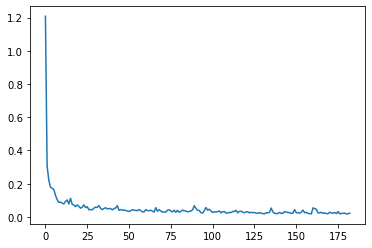

In [8]:
lr = 0.01

y_train = np.reshape(y_train, (-1, 1))
y_test = np.reshape(y_test, (-1, 1))

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
mae_tab= baselineModels.tabnetreg(X_train,y_train,X_test,y_test,batch_size,n_features,n_target,n_epochs, lr)
sb.glue("TabNet MAE",mae_tab)
print("TabNet MAE",mae_tab)